In [ ]:

# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



/kaggle/input/nek-310-lecture-6/Arlington_Homes.xlsx


<h3>Import the data</h3>

In [ ]:
arlington=pd.read_excel('Arlington_Homes.xlsx')
print(arlington)

     Price  Sqft  Beds  Baths  Col
0   840000  2768     4    3.5    1
1   822000  2500     4    2.5    1
2   713000  2400     3    3.0    1
3   689000  2200     3    2.5    1
4   685000  2716     3    3.5    1
5   645000  2524     3    2.0    1
6   625000  2732     4    2.5    0
7   620000  2436     4    3.5    1
8   587500  2100     3    1.5    1
9   585000  1947     3    1.5    1
10  583000  2224     3    2.5    1
11  569000  3262     4    2.0    0
12  546000  1792     3    2.0    0
13  540000  1488     3    1.5    0
14  537000  2907     3    2.5    0
15  516000  1951     4    2.0    1
16  511000  1752     3    1.5    1
17  510000  1727     3    2.0    1
18  495000  1692     3    2.0    0
19  463000  1714     3    2.0    0
20  457000  1650     3    2.0    0
21  451000  1685     3    2.0    0
22  435000  1500     3    1.5    1
23  431700  1896     2    1.5    0
24  414000  1182     2    1.5    0
25  401500  1152     3    1.0    0
26  399000  1383     4    1.0    0
27  380000  1344    

<h3>Descriptive stats</h3>

In [26]:
#arlington.describe()

arlington.describe().map('{:,.0f}'.format)

,Price,Sqft,Beds,Baths,Col
count,36,36,36,36,36
mean,"507,503","1,877",3,2,0
std,"136,396",592,1,1,0
min,"307,500",850,1,1,0
25%,"394,250","1,419",3,1,0
50%,"502,500","1,740",3,2,0
75%,"585,625","2,306",3,2,1
max,"840,000","3,262",5,4,1


<h3> Descriptives for some chosen variables</h3>

In [27]:
arlington[['Price','Sqft']].describe()

,Price,Sqft
count,36.000000,36.000000
mean,507502.777778,1876.555556
std,136396.318522,591.610656
min,307500.000000,850.000000
25%,394250.000000,1419.000000
50%,502500.000000,1739.500000
75%,585625.000000,2306.250000
max,840000.000000,3262.000000


<h3>Skewness of price</h3>

In [28]:
arlington['Price'].skew()

0.6763313876840488

<h3>Quantiles</h3>

In [29]:
arlington['Price'].quantile()

502500.0

In [30]:
arlington['Price'].quantile(0.75)

585625.0

<h2> Barcharts and Histograms </h2>
<h3> Histogram of Price </h3>

<Axes: >

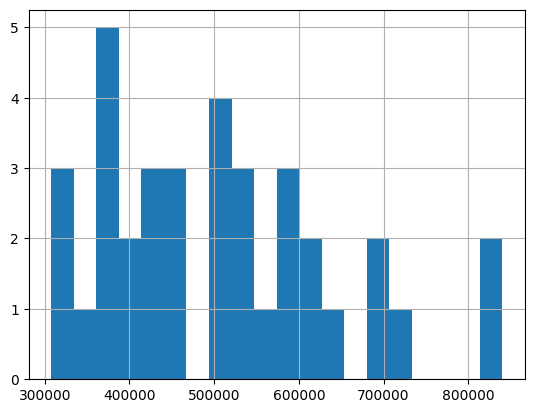

In [31]:
arlington['Price'].hist(grid=True, bins=20)

<h3> Histogram of Price by Proximity </h3>

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

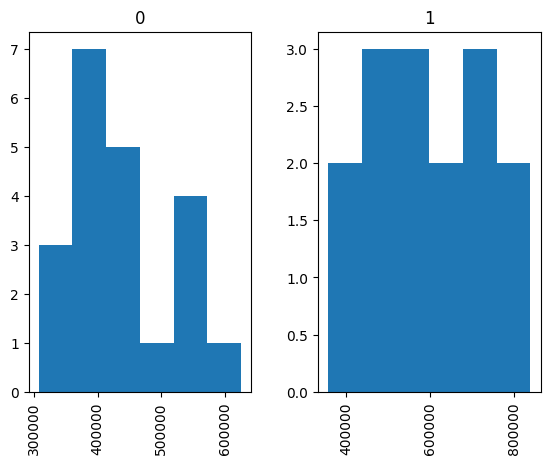

In [32]:
arlington['Price'].hist(grid=False, by=arlington['Col'], bins=6)

<h3> Frequencies for beds split on proximity to College </h3>

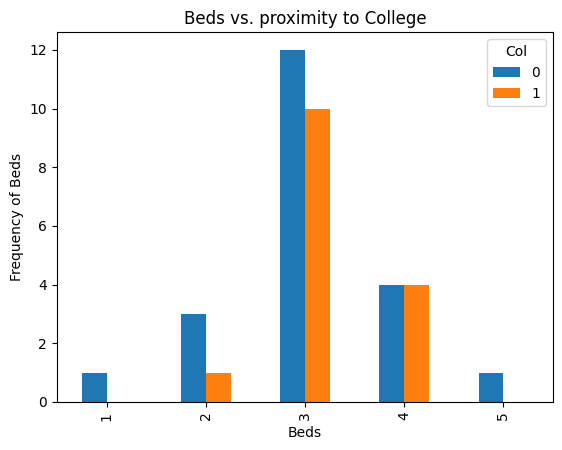

In [33]:
import matplotlib.pyplot as plt

pd.crosstab(arlington['Beds'],arlington['Col']).plot(kind='bar')
plt.title('Beds vs. proximity to College')
plt.xlabel('Beds')
plt.ylabel('Frequency of Beds')
plt.savefig('Frequency of Beds')

<h3> Distribution of beds between proximity/non-proximity per no of beds </h3>

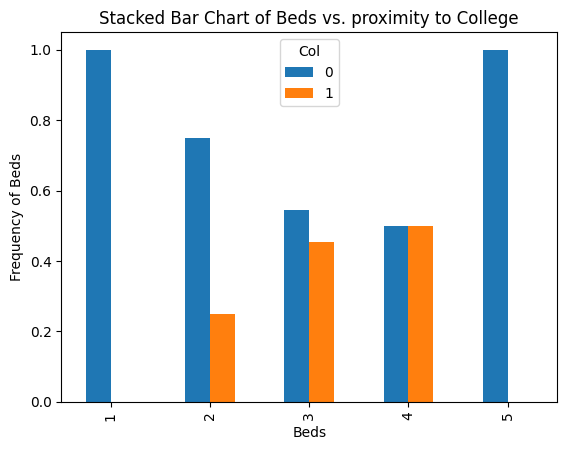

In [34]:
table=pd.crosstab(arlington['Beds'],arlington['Col'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Beds vs. proximity to College')
plt.xlabel('Beds')
plt.ylabel('Frequency of Beds')
plt.savefig('Frequency of Beds')

<h2> Histogram for Price with bells and whistles </h2>

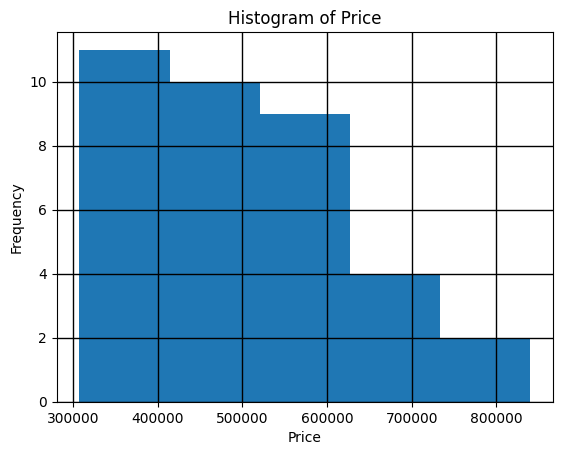

In [35]:
arlington['Price'].hist(bins=5, color='Tab:blue')
plt.grid(color='Black', linestyle='-', linewidth=1)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig('hist_price')

<h2> Scatter plots </h2>
<h3> Price vs. Sqft </h3>

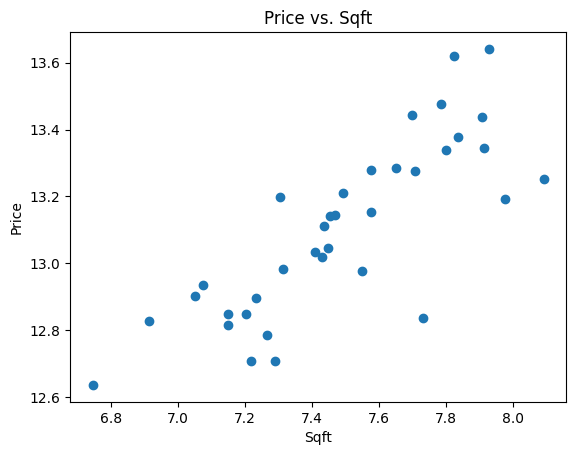

In [36]:
#plt.scatter(arlington['Sqft'],arlington['Price'])
plt.scatter(np.log(arlington['Sqft']),np.log(arlington['Price']))
plt.title('Price vs. Sqft')
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.show()


<h2> Grouped (proximity vs. non-proximity) scatter plot for Sqft vs. Beds </h2>
<h3> Some data prep </h3>

In [37]:
Col_0=arlington[arlington['Col']==0]
Col_1=arlington[arlington['Col']==1]

In [38]:
x0=Col_0['Beds']
x1=Col_1['Beds']
y0=Col_0['Sqft']
y1=Col_1['Sqft']

<h3> The actual plot </h3>

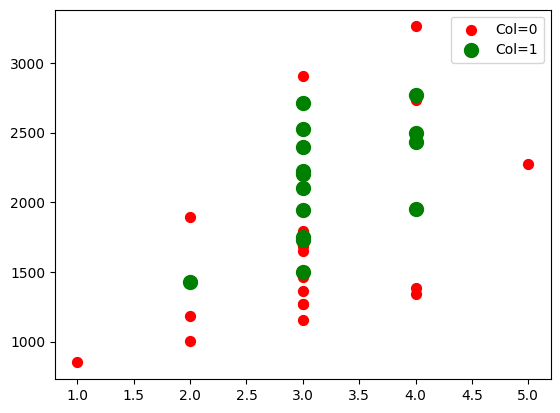

In [39]:
plt.scatter(x0,y0,s=50,c='r',label='Col=0')
plt.scatter(x1,y1,s=100,c='g', label='Col=1')
plt.legend()
plt.show()

<h2> Boxlpots </h2>
<h3> Price for non-proximity </h3>

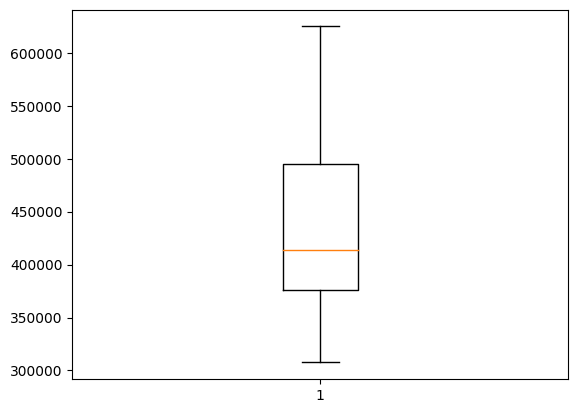

In [40]:
plt.boxplot(arlington['Price'][arlington['Col']==0])
plt.show()

<h3> Horizontal boxplot for Price grouped on Sqft median </h3>

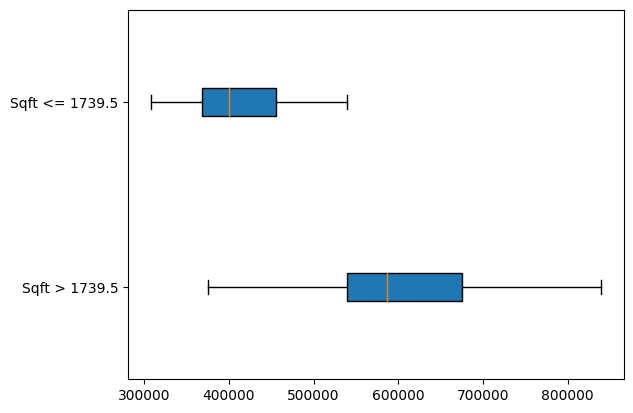

In [41]:
all_data=[arlington['Price'][arlington['Sqft']>arlington['Sqft'].median()],arlington['Price'][arlington['Sqft']<=arlington['Sqft'].median()]]
labels=['Sqft > 1739.5','Sqft <= 1739.5']
plt.boxplot(all_data,
                     vert=False,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
plt.show()

<h2> Bubbleplot for Price vs Sqft and Beds grouped on proximity/non-proximity </h2>

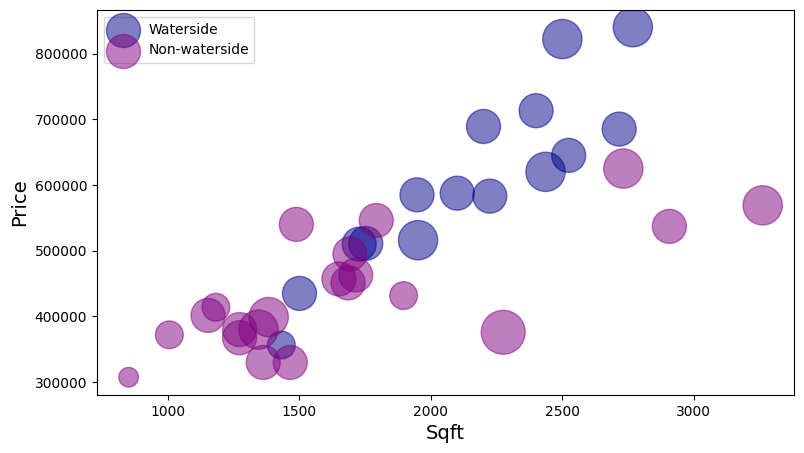

In [42]:
Beds_col0=arlington['Beds'][arlington['Col']==0]
Beds_col1=arlington['Beds'][arlington['Col']==1]
plt.figure(figsize=(9, 5))
plt.scatter(arlington['Sqft'][arlington['Col']==1], arlington['Price'][arlington['Col']==1], 
                  color='darkblue', 
                 alpha=0.5,
                 s = Beds_col1 * 200,label='Waterside')
plt.scatter(arlington['Sqft'][arlington['Col']==0], arlington['Price'][arlington['Col']==0], 
                  color='purple', 
                 alpha=0.5,
                 s = Beds_col0 * 200,
                 label='Non-waterside')
plt.xlabel("Sqft", size=14)
plt.ylabel("Price", size=14)
plt.legend(loc='upper left')
plt.show()

<h1> Regression </h1>
<h4> Wish to fit a regression model where Price is explained by some combination of Sqft, Beds, Baths and Proximity/Non-proximity. First we try to assess the functional relationships between the response (Price) and the potential explanatory variables (Sqft, Beds, Baths and Proximity/Non-proximity) </h4>
<h4></h4>
$ Price=\beta_0+\beta_1Sqft+\beta_2Beds+\beta_3Baths+\beta_4d_{Proximity}+\epsilon$
<h4></h4>
<h4>First we try to assess the functional relationships between the response (Price) and the potential explnatory variables (Sqft, Beds, Baths and Proximity/Non-proximity) </h4>
<h3> Relationship between Price and Sqft </h3>

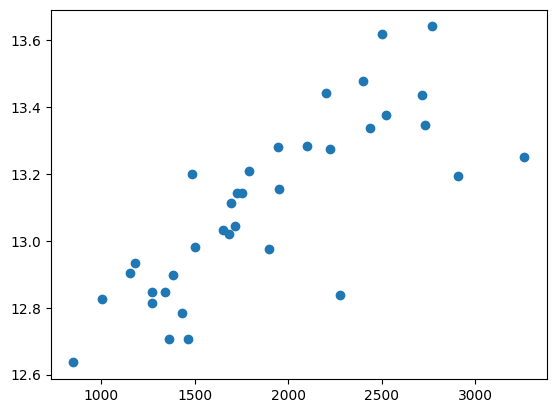

In [43]:
#plt.scatter(arlington['Sqft'],arlington['Price'])
#plt.scatter(np.log(arlington['Sqft']),arlington['Price'])
plt.scatter(arlington['Sqft'],np.log(arlington['Price']))
plt.show()

<h3> Relationship between Price and Beds </h3>

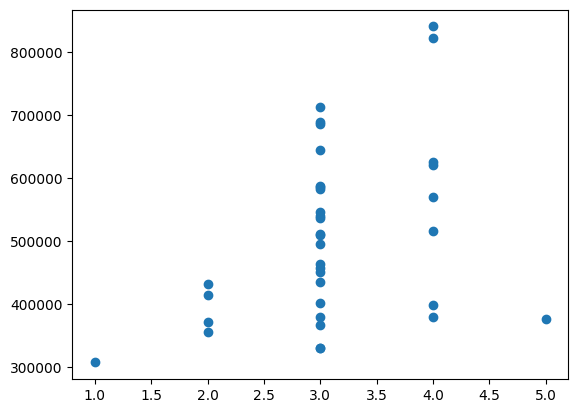

In [44]:
plt.scatter(arlington['Beds'],arlington['Price'])
plt.show()

<h3> Relationship between Price and Baths </h3>

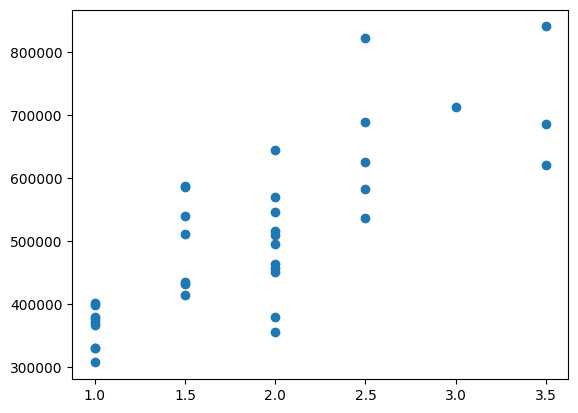

In [45]:
plt.scatter(arlington['Baths'],arlington['Price'])
plt.show()

<h3> Import statsmodels package </h3>

In [46]:
import statsmodels.api as sm

<h3> Create input arrays </h3>

In [47]:
X=arlington.drop(['Price'],axis=1)
y=arlington['Price']

In [48]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     27.01
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.03e-09
Time:                        07:57:19   Log-Likelihood:                -449.20
No. Observations:                  36   AIC:                             908.4
Df Residuals:                      31   BIC:                             916.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.659e+05   5.24e+04      3.169      0.0

<h3> It seems that there is no statistically significant relationship between Beds and Price so maybe we do not want to use Beds in the model. Also, there is a warning that may multicollinearity may be a problem, which potentially can be solved by omitting Beds. </h3>

In [49]:
X=arlington.drop(['Price','Beds'],axis=1)
y=arlington['Price']

In [50]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     37.09
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.58e-10
Time:                        07:57:19   Log-Likelihood:                -449.23
No. Observations:                  36   AIC:                             906.5
Df Residuals:                      32   BIC:                             912.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.74e+05   3.87e+04      4.493      0.0

<h3> Now all variables included in the model are statisticlally significant and the model to be used for predictions would be</h3>
<h5></h5> 
$\widehat{Price}=174000+95.42Sqft+65890Baths+74070d_{Proximity}$
<h3>But there is still a warning and what about the relationship between Price and Sqft? Do we get a better fit (larger R-squared) if we use log(Sqft) instead of Sqft? Or maybe if we use log(Price) as response? Let's first check multicollinearity by computing the correlation coefficient between Sqft and Baths.</h3>

In [51]:
np.corrcoef(arlington['Sqft'],arlington['Baths'])[0,1]

0.7199320536932706

<h3> A correlation of 0.72 is not low but the coefficient estimates have the correct signs so we decide to keep Baths in the model. Next step is to check if we can improve the model through transformations of Price and/or Sqft. </h3>

In [52]:
arlington_log=arlington
arlington_log['log_Sqft']=np.log(arlington['Sqft'])
arlington_log=arlington_log.drop(['Sqft','Beds'],axis=1)
X_log=arlington_log.drop(['Price'],axis=1)

In [53]:
# with statsmodels
X_log = sm.add_constant(X_log) # adding a constant
 
model = sm.OLS(y, X_log).fit()
predictions = model.predict(X_log) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     36.33
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           2.03e-10
Time:                        07:57:19   Log-Likelihood:                -449.52
No. Observations:                  36   AIC:                             907.0
Df Residuals:                      32   BIC:                             913.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.487e+05   3.61e+05     -2.628      0.0

<h3> The R-square did not increase when using log(Sqft) as opposed to Sqft. What if we apply the log-transform to price? </h3>

In [54]:
arlington['log_Price']=np.log(arlington['Price'])
arlington_logy=arlington.drop(['Price'],axis=1)
X=arlington_logy.drop(['log_Price','log_Sqft','Beds'],axis=1)
y_log=arlington_logy['log_Price']

In [55]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y_log, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     38.44
Date:                Fri, 31 Jan 2025   Prob (F-statistic):           1.01e-10
Time:                        07:57:19   Log-Likelihood:                 25.038
No. Observations:                  36   AIC:                            -42.08
Df Residuals:                      32   BIC:                            -35.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.4507      0.074    169.276      0.0

<h3> The R-square has improved, but just comparing the R-sq from the log(Price)-model to a model where Price is not transformed is potentially deceptive. Why? </h3>

<h3> An R-sq computed on log-transformed y-data is not comparable to one computed on the original scale. In order to get a proper R-sq, we first need to transform the log-scale predictions back to the orignial scale. In order to get unbiased predictions, we have to include a correction term based on an estimation of the standard deviation of the error term. First we append the predictions from the log(Price)-model to the input data.  </h3>

In [56]:
arlington['Pred']=predictions
print(arlington)

     Price  Sqft  Beds  Baths  Col  log_Sqft  log_Price       Pred
0   840000  2768     4    3.5    1  7.925880  13.641157  13.554851
1   822000  2500     4    2.5    1  7.824046  13.619496  13.381916
2   713000  2400     3    3.0    1  7.783224  13.477237  13.422248
3   689000  2200     3    2.5    1  7.696213  13.442997  13.322768
4   685000  2716     3    3.5    1  7.906915  13.437174  13.544598
5   645000  2524     3    2.0    1  7.833600  13.377006  13.326600
6   625000  2732     4    2.5    0  7.912789  13.345507  13.289556
7   620000  2436     4    3.5    1  7.798113  13.337475  13.489393
8   587500  2100     3    1.5    1  7.649693  13.283632  13.182957
9   585000  1947     3    1.5    1  7.574045  13.279367  13.152791
10  583000  2224     3    2.5    1  7.707063  13.275942  13.327500
11  569000  3262     4    2.0    0  8.090096  13.251636  13.334003
12  546000  1792     3    2.0    0  7.491088  13.210374  13.044178
13  540000  1488     3    1.5    0  7.305188  13.199324  12.92

<h3> Compute the residuals and append to the dataset. </h3>

In [57]:
arlington['Res']=arlington['log_Price']-arlington['Pred']
print(arlington)

     Price  Sqft  Beds  Baths  Col  log_Sqft  log_Price       Pred       Res
0   840000  2768     4    3.5    1  7.925880  13.641157  13.554851  0.086307
1   822000  2500     4    2.5    1  7.824046  13.619496  13.381916  0.237579
2   713000  2400     3    3.0    1  7.783224  13.477237  13.422248  0.054989
3   689000  2200     3    2.5    1  7.696213  13.442997  13.322768  0.120228
4   685000  2716     3    3.5    1  7.906915  13.437174  13.544598 -0.107424
5   645000  2524     3    2.0    1  7.833600  13.377006  13.326600  0.050405
6   625000  2732     4    2.5    0  7.912789  13.345507  13.289556  0.055951
7   620000  2436     4    3.5    1  7.798113  13.337475  13.489393 -0.151919
8   587500  2100     3    1.5    1  7.649693  13.283632  13.182957  0.100675
9   585000  1947     3    1.5    1  7.574045  13.279367  13.152791  0.126576
10  583000  2224     3    2.5    1  7.707063  13.275942  13.327500 -0.051558
11  569000  3262     4    2.0    0  8.090096  13.251636  13.334003 -0.082367

<h3> Compute an unbiased estimate of the standard deviation of the error term </h3> 

In [58]:
#Standard error of the estimate
s_e=np.sqrt(np.sum(arlington['Res']**2)/32)
s_e

0.12802181154504857

<h3> Transform predictions back to the original scale. The prediction equation is</h3>
<h5></h5>
$\widehat{Price}=\exp\lbrace 12.451+0.0002Sqft+0.120Baths+0.138d_{Proximity}+0.128^2/2 \rbrace$
<h5>where $\exp\lbrace x\rbrace=e^x$</h5>
<h5></h5>

In [59]:
arlington['Prop_pred']=np.exp(arlington['Pred']+s_e**2/2)

<h3> Now the proper R-sq can be computed as the squared correlation between the predictions on the original scale and Price (on the original scale). </h3>

In [60]:
Proper_Rsq=(np.corrcoef(arlington['Prop_pred'],arlington['Price'])[0,1])**2
print(Proper_Rsq)

0.7813304630177614


<h3> So the fit of the log(Price)-model is better that the fit of the model where Price is not log-tansformed. To check some further diagnostics, we compute the standardized residuals. This makes it easier to check normality graphically. </h3>

In [61]:
arlington['Std_res']=(arlington['Res']-arlington['Res'].mean())/arlington['Res'].std()
print(arlington)

     Price  Sqft  Beds  Baths  Col  log_Sqft  log_Price       Pred       Res  \
0   840000  2768     4    3.5    1  7.925880  13.641157  13.554851  0.086307   
1   822000  2500     4    2.5    1  7.824046  13.619496  13.381916  0.237579   
2   713000  2400     3    3.0    1  7.783224  13.477237  13.422248  0.054989   
3   689000  2200     3    2.5    1  7.696213  13.442997  13.322768  0.120228   
4   685000  2716     3    3.5    1  7.906915  13.437174  13.544598 -0.107424   
5   645000  2524     3    2.0    1  7.833600  13.377006  13.326600  0.050405   
6   625000  2732     4    2.5    0  7.912789  13.345507  13.289556  0.055951   
7   620000  2436     4    3.5    1  7.798113  13.337475  13.489393 -0.151919   
8   587500  2100     3    1.5    1  7.649693  13.283632  13.182957  0.100675   
9   585000  1947     3    1.5    1  7.574045  13.279367  13.152791  0.126576   
10  583000  2224     3    2.5    1  7.707063  13.275942  13.327500 -0.051558   
11  569000  3262     4    2.0    0  8.09

<h3> Histogram of the standardized residuals </h3>

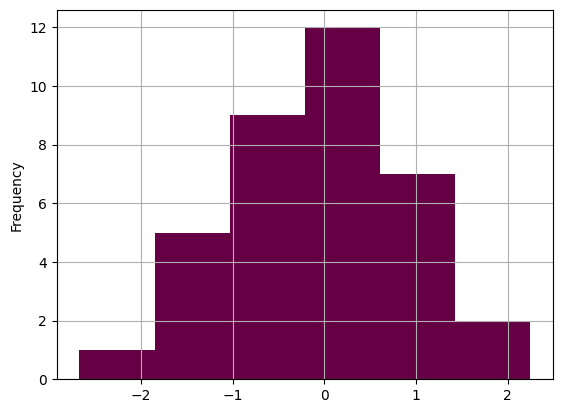

In [62]:
arlington['Std_res'].plot.hist(grid=True, bins=6, rwidth=1.0, color="#660044")
plt.show()

<h3> PP-plot. We want the residuals to be close to the line and not show systematic devations. </h3>

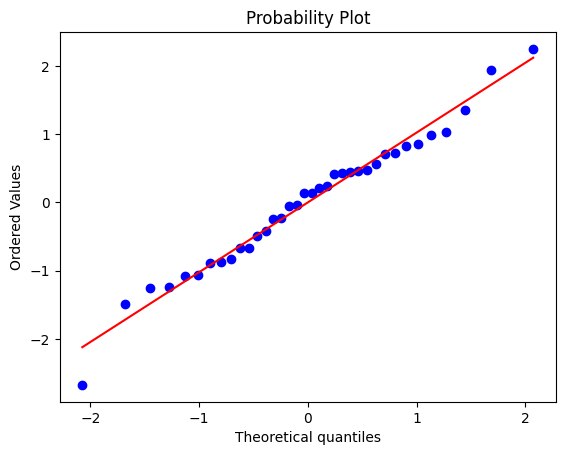

In [63]:
from scipy import stats as st

st.probplot(arlington['Std_res'], dist="norm", plot=plt)
plt.show()

<h3> Below we plot residuals against predicited values to check for heteroskedasticity (and autocorrelation). We want to see an even distribution around the line y=0 with no systematic patterns. </h3>

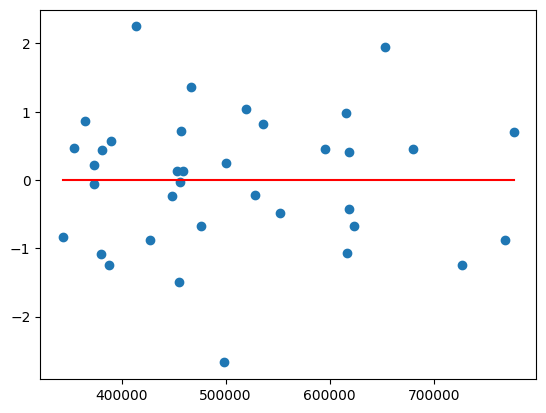

In [64]:
import matplotlib.lines as mlines
fig, ax = plt.subplots()
ax.scatter(arlington['Prop_pred'],arlington['Std_res'])
line = mlines.Line2D([arlington['Prop_pred'].min(), arlington['Prop_pred'].max()], [0, 0], color='red')
ax.add_line(line)
plt.show()

<h3> The plot looks ok. Happy days! </h3>

arlington=pd.read_excel('/kaggle/input/nek-310-lecture6/Arlington_Homes.xlsx')
print(arlington)